### 603218 日月股份
##### 加权平均净资产收益率

| 2019 | 2018 | 2017 |
| ---- | ---- | ---- |
| 15.92% | 9.81% | 8.41% |

##### 2020-12-16
* 风电行业铸件生成


In [12]:
ticker = '603218'

In [13]:
%%html
<style>
table {float:left}
</style>

In [14]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
baostock.login()
code = bu.get_bs_code(ticker)
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = bu.get_price_daily(code)
bs = data.get_BS(ticker)
baostock.logout()

login success!
logout success!


In [16]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,0.97,0.95,"3,485,830,443 ( 48.3%)","2,915,708,382 ( 41.8%)","504,539,612 ( 79.8%)"
2018-12-31,0.54,0.54,"2,350,589,291 ( 28.3%)","2,056,066,671 ( 28.9%)","280,554,463 ( 23.8%)"
2017-12-31,0.57,0.57,"1,831,436,338 ( 14.4%)","1,594,494,614 ( 31.7%)","226,586,726 (-33.2%)"
2016-12-31,0.94,0.94,"1,600,333,575 (-14.9%)","1,210,297,377 (-12.9%)","338,982,279 (-20.0%)"
2015-12-31,1.18,1.18,"1,880,500,503 ( 30.1%)","1,389,454,093 ( 18.5%)","423,569,018 ( 74.2%)"
2014-12-31,0.68,0.68,"1,445,119,732 ( 33.1%)","1,172,195,172 ( 25.3%)","243,179,108 ( 74.3%)"
2013-12-31,0.39,0.39,"1,085,644,901 ( nan%)","935,622,182 ( nan%)","139,530,301 ( nan%)"


In [17]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-09-30,"1,498,624,220 ( 65.6%)","293,838,561 (126.3%)"
2020-06-30,"1,402,139,210 ( 62.5%)","277,434,229 (110.7%)"
2020-03-31,"832,843,404 ( 23.6%)","130,426,635 ( 57.1%)"
2019-12-31,"1,044,463,826 ( 50.7%)","159,994,940 ( 96.5%)"
2019-09-30,"904,819,993 ( 42.8%)","129,854,150 ( 60.3%)"
2019-06-30,"862,759,201 ( 50.1%)","131,694,006 ( 89.9%)"
2019-03-31,"673,787,423 ( 49.9%)","82,996,517 ( 70.2%)"
2018-12-31,"692,867,555 ( 38.7%)","81,427,882 ( 84.7%)"
2018-09-30,"633,637,763 ( 23.2%)","81,002,367 ( 36.5%)"


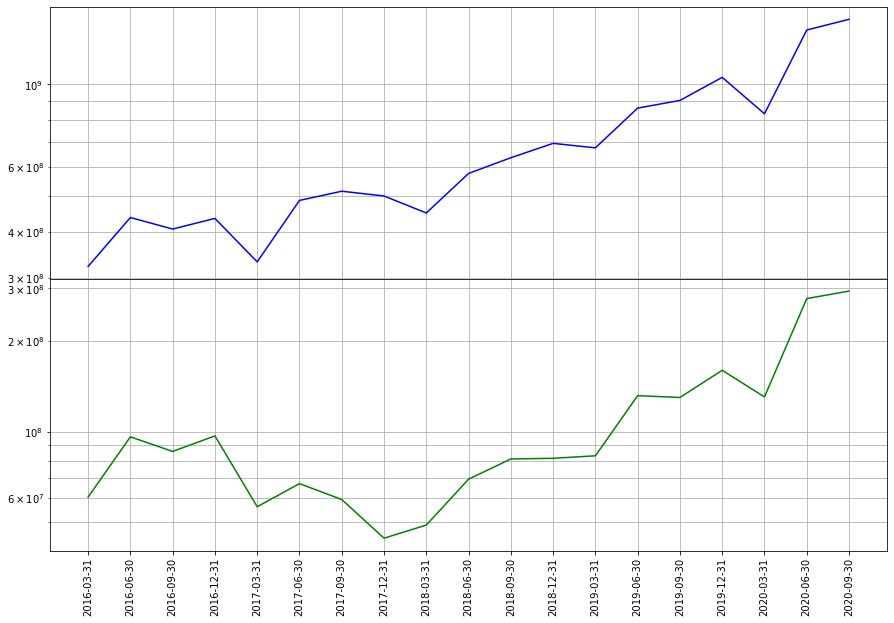

In [18]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [19]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,25.2,14.5
2018-12-31,21.4,11.9
2017-12-31,24.3,12.4
2016-12-31,35.4,21.2
2015-12-31,37.6,22.5
2014-12-31,31.7,16.8
2013-12-31,26.9,12.9


In [20]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"3,485,830,443 ( 48.3%)","481,699,290 ( 21.9%)","772,114,862 ( 66.3%)","1,122,413,444 ( 29.7%)"
2018-12-31,"2,350,589,291 ( 28.3%)","395,111,748 ( 32.6%)","464,178,511 ( 20.0%)","865,392,309 ( 16.9%)"
2017-12-31,"1,831,436,338 ( 14.4%)","297,938,774 ( 36.0%)","386,764,261 ( 25.7%)","740,416,888 ( 19.3%)"
2016-12-31,"1,600,333,575 (-14.9%)","219,015,888 ( 15.7%)","307,741,741 ( 10.7%)","620,777,039 ( 3.4%)"
2015-12-31,"1,880,500,503 ( 30.1%)","189,242,922 (-24.8%)","277,928,013 ( -6.2%)","600,265,186 ( 44.6%)"
2014-12-31,"1,445,119,732 ( 33.1%)","251,715,007 ( -3.4%)","296,195,929 ( 65.8%)","415,051,037 ( 40.1%)"
2013-12-31,"1,085,644,901 ( nan%)","260,524,586 ( nan%)","178,598,440 ( nan%)","296,252,637 ( nan%)"


In [21]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])


前复权        滚动市盈率       前复权增长
      first   last   min   max      
交易日期                                
2016  18.14  21.95  37.0  44.8  21.0
2017  24.15  11.89  31.9  69.9 -50.8
2018  12.08   8.84  21.0  41.1 -26.8
2019   8.95  14.64  21.7  46.7  63.6
2020  15.39  27.23  19.3  32.7  76.9

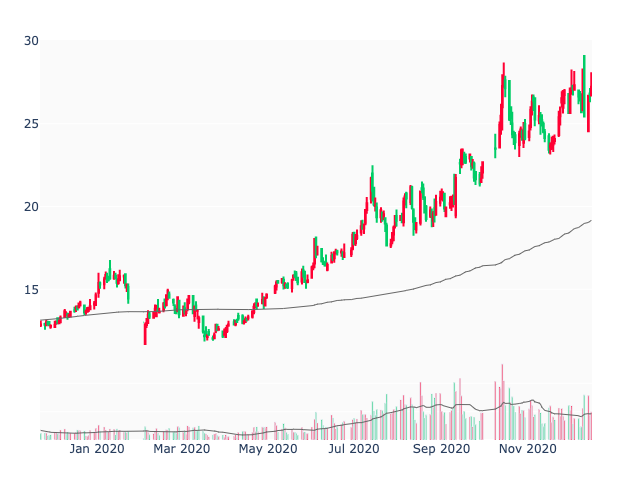

In [22]:
draw(mkt, 260, 200, 20)